In [235]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    

def diffution_curve(z, alpha, beta):
    return (alpha * np.log(1 - beta * z))**(0.5)
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [28]:
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_Sol_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.7_Sol_0.85_ADUs__.pkl' ## Demasiados eventos redondos
path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.85_Sol_0.7_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0_Sol_0.7_ADUs__.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [29]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Llaves secundarias por extensión:  dict_keys(['charge', 'Vertical_Events', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  20189


In [30]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

matrix_ext_2_vertical = data_histogram['extension_2']['Vertical_Events']
matrix_ext_2_horizontal = data_histogram['extension_2']['Horizontal_Events']

matrix_ext_4_vertical = data_histogram['extension_4']['Vertical_Events']
matrix_ext_4_horizontal = data_histogram['extension_4']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
print('Muones verticales en ext_2: ', len(matrix_ext_2_vertical))
print('Muones verticales en ext_4: ', len(matrix_ext_4_vertical))
print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
print('Muones horizontales en ext_2: ', len(matrix_ext_2_horizontal))
print('Muones horizontales en ext_4: ', len(matrix_ext_4_horizontal))
print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  3863
Muones verticales en ext_2:  3845
Muones verticales en ext_4:  3540
Muones verticales totales detectados:  11248

Muones horizontales en ext_1:  3192
Muones horizontales en ext_2:  2671
Muones horizontales en ext_4:  3078
Muones horizontales totales detectados:  8941


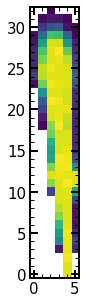

In [528]:
figure , axs = plt.subplots(1,1,figsize=[5,5])
# axs.imshow(matrix_ext_1_vertical[909]) # 131, 508, 686, 1166, 1610, 2769, 3224, 3493 indices para path con elip 0.85, Sol 0.7 
# axs.imshow(matrix_ext_2_vertical[884]) 
axs.imshow(matrix_ext_4_vertical[862])  # 77, 1911, 2381, 2930 indices para path con elip 0.85, Sol 0.7


plt.show()

In [480]:
list_index_long_muons = []

for index in np.arange(0, len(matrix_ext_4_vertical)):
    size_x = matrix_ext_4_vertical[index].shape[1]
    size_y = matrix_ext_4_vertical[index].shape[0]
    if size_y > 30:
        # print(size_x, size_y)
        list_index_long_muons.append(index)

# print(list_index_long_muons)+
print('Muones largos detectados: ', len(list_index_long_muons))
print('Indices: ', list_index_long_muons)

Muones largos detectados:  193
Indices:  [3, 10, 16, 21, 23, 31, 77, 81, 83, 93, 223, 242, 272, 277, 295, 313, 325, 346, 358, 380, 414, 433, 440, 452, 464, 483, 488, 496, 517, 596, 603, 609, 617, 627, 653, 660, 665, 688, 775, 777, 788, 792, 862, 881, 882, 908, 915, 921, 935, 958, 963, 988, 1012, 1058, 1070, 1092, 1108, 1130, 1135, 1139, 1166, 1168, 1196, 1225, 1240, 1243, 1252, 1290, 1317, 1325, 1334, 1348, 1370, 1396, 1412, 1414, 1424, 1431, 1437, 1445, 1446, 1463, 1470, 1471, 1508, 1520, 1527, 1588, 1641, 1657, 1677, 1684, 1702, 1706, 1710, 1713, 1725, 1752, 1773, 1783, 1811, 1858, 1866, 1889, 1911, 1913, 1914, 1936, 1937, 1956, 1970, 1995, 2003, 2011, 2046, 2055, 2064, 2066, 2067, 2068, 2114, 2123, 2136, 2139, 2167, 2170, 2216, 2251, 2265, 2267, 2318, 2320, 2335, 2338, 2345, 2357, 2381, 2395, 2414, 2436, 2444, 2459, 2545, 2561, 2563, 2582, 2587, 2641, 2714, 2763, 2787, 2811, 2829, 2836, 2887, 2890, 2905, 2930, 2935, 2937, 2963, 2971, 2981, 2996, 3037, 3048, 3051, 3069, 3080, 3082, 3

## Perfil Energético

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15763509.0


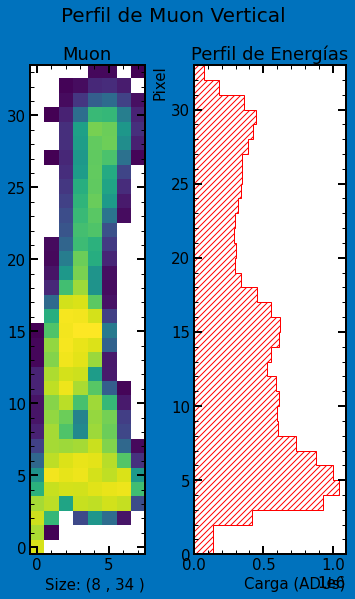

In [186]:
num = 79

fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in matrix_ext_1_vertical[num:num + 1]:
    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]
    print(event.sum())

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1, nlabels_verticalMuon):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

# Modelo de Difusión

## Ajuste de Gaussiana por linea

Centroide:  3.6538691218208506  Amplitud:  140779.15688603453 sigma:  0.5234545596054209


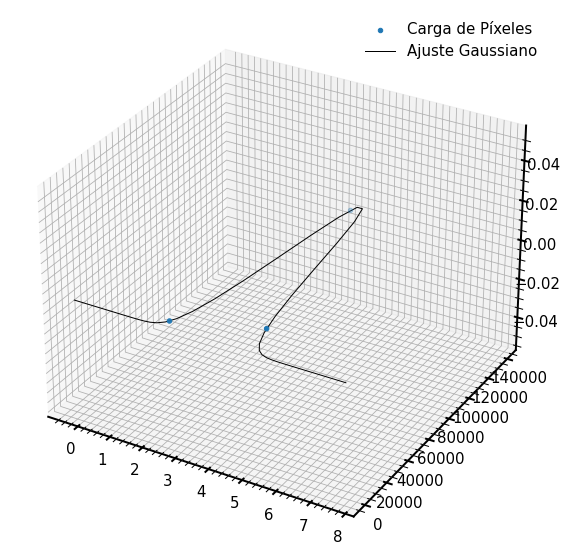

In [53]:
lable_line = 5
event = matrix_ext_1_vertical[1166]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

# print(nlabels_verticalMuon)
line = label_verticalMuon == lable_line
loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
mask_35 = np.invert(label_verticalMuon == lable_line)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
# print(data_mask[0])
Longitud_linea = len(data_mask[0])


# fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))
fig, axs_all = plt.subplots(subplot_kw={"projection": "3d"}, figsize = [10,10])


# Bins = len(data_mask[0]) + 20


# list_xlabel = []
# for index in np.arange(0, len(data_mask[0])):
#     list_xlabel.append(index)

list_xlabel = np.linspace(0, len(data_mask[0]), len(data_mask[0]))

list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2))
# for index in np.arange(-3, 10):
#     list_xlabel_long.append(index)

axs_all.scatter(list_xlabel, data_mask[0], 0, 'o', label = 'Carga de Píxeles')
popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}

Centroide = popt[1]
list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), 0, 'k', label = 'Ajuste Gaussiano')	
axs_all.legend()

print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)


# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


## Todas las gaussianas de un muon

[0.35614526776964095, 0.5234545596054209, 0.6917368132685723, 0.8162565507123131, 0.706916961147281, 0.8382196266439025, 0.9137191977564896, 0.9191891612466403, 1.0249266993187882, 1.1551416737984577, 1.1276450896819206, 1.0292956249756537, 1.0894899679137449, 1.1179778345547278, 1.139731015621961, 1.1554661412555234, 1.172910865646841, 1.2618175336986617, 1.2810928758453313, 1.4382924227449634, 1.7341255367738753, 1.8820627450929688, 1.7702352424955974, 1.5760329631685532, 1.4130984080803306, 1.3274171650274127, 1.360640901653804, 1.4535241403869839, 1.465045895779723, 1.5291989423144268, 1.391282458698751, 1.7462941533174121]


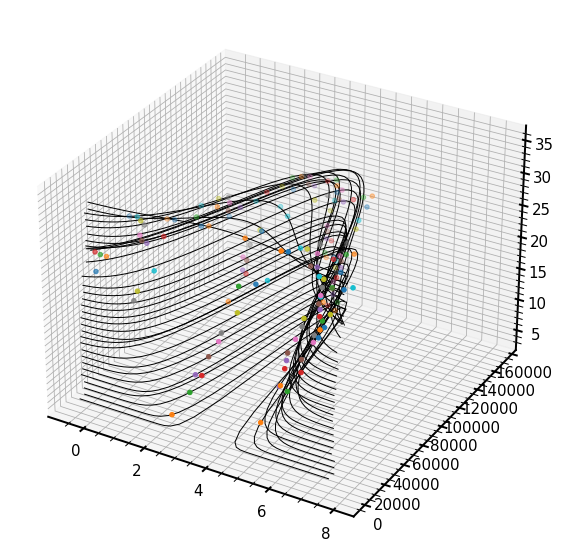

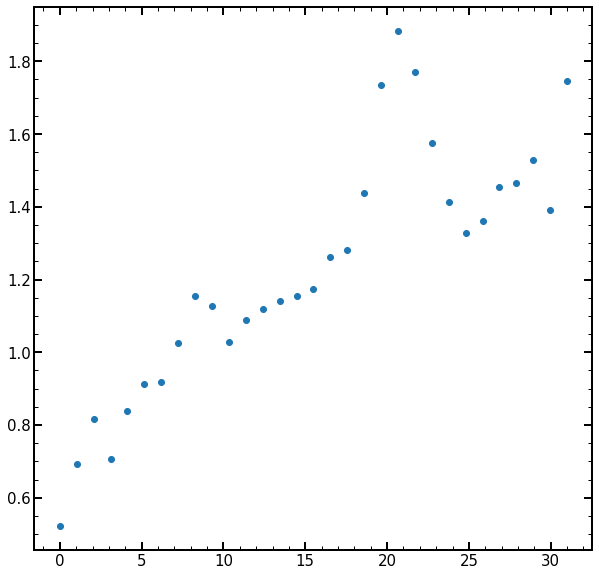

In [66]:
event = matrix_ext_1_vertical[1166]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

list_sigmas = []

# fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])
fig_2, axs_all_2 = plt.subplots(figsize = [10, 10])

for lable_line in np.arange(4, nlabels_verticalMuon):

    ## Enmascara la linea en turno
    # print(nlabels_verticalMuon)
    line = label_verticalMuon == lable_line
    loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
    mask_35 = np.invert(label_verticalMuon == lable_line)
    data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    # print(data_mask[0])

    ## Se obtiene su longitud ##
    Longitud_linea = len(data_mask[0])

    ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
    list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2))
    popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

    dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
    Centroide = popt[1]
    Sigma = abs(popt[2])
    # print(Sigma)

    ## Se grafican los puntos experimentales ##
    axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

    ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
    list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
    axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
    # axs_all.legend()

    # Se guarda la sigma de la distribución en una lista ##
    list_sigmas.append(Sigma)
    # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

# print(list_sigmas)

popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

list_xlabel_sigmas = np.linspace(0, len(list_sigmas[1:]), len(list_sigmas[1:]))
axs_all_2.scatter(list_xlabel_sigmas, list_sigmas[1:])
plt.show()

# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


## Gráfica de sigmas de distintos muones

/tmp/ipykernel_6543/949833378.py:16: RuntimeWarning: invalid value encountered in log
  return (alpha * np.log(1 - beta * z))**(0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


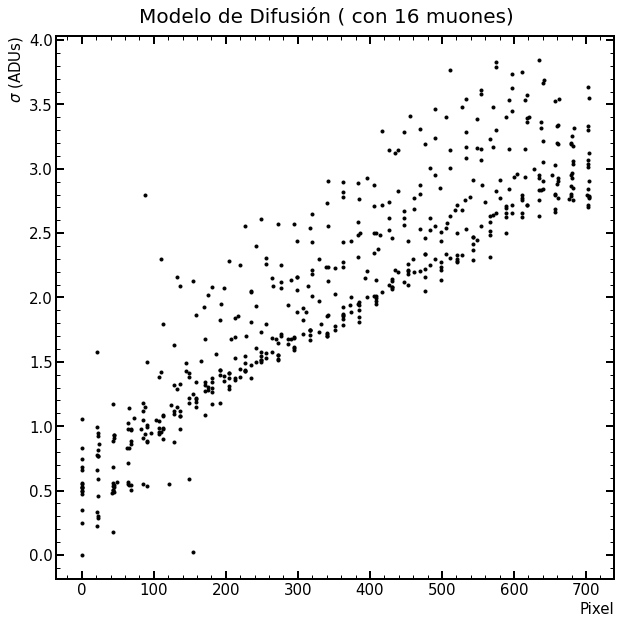

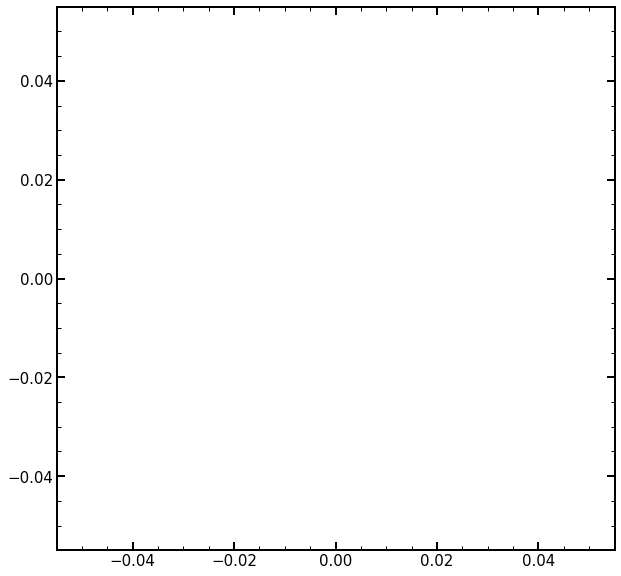

In [352]:
fig_2, axs_all_2 = plt.subplots(figsize = [10, 10])
fig, axs_all = plt.subplots(figsize = [10, 10])
n_muon = 0
CCD_depth = 725 #micras


list_all_sigmas = []
# for label_event in (131, 508, 686, 1166, 1610, 2769, 3224, 3493):

for label_event in (53, 1166, 1610, 2769, 3224):
    event = matrix_ext_1_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon - 1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')#, label = 'Muon: ' + str(n_muon))
    n_muon = n_muon + 1


for label_event in (77, 1911, 2381, 2930):
    event = matrix_ext_4_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


for label_event in (56, 107, 335, 587, 1206, 1454, 1926):
    event = matrix_ext_2_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


Logntidud_all_sigmas = len(list_all_sigmas)

array_x = np.linspace(0, Logntidud_all_sigmas, Logntidud_all_sigmas)

popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

axs_all_2.legend()
fig_2.suptitle('Modelo de Difusión ( con ' + str(n_muon) + ' muones)',  size = 20, y=0.92 )
axs_all_2.set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2.set_xlabel('Pixel')
plt.show()

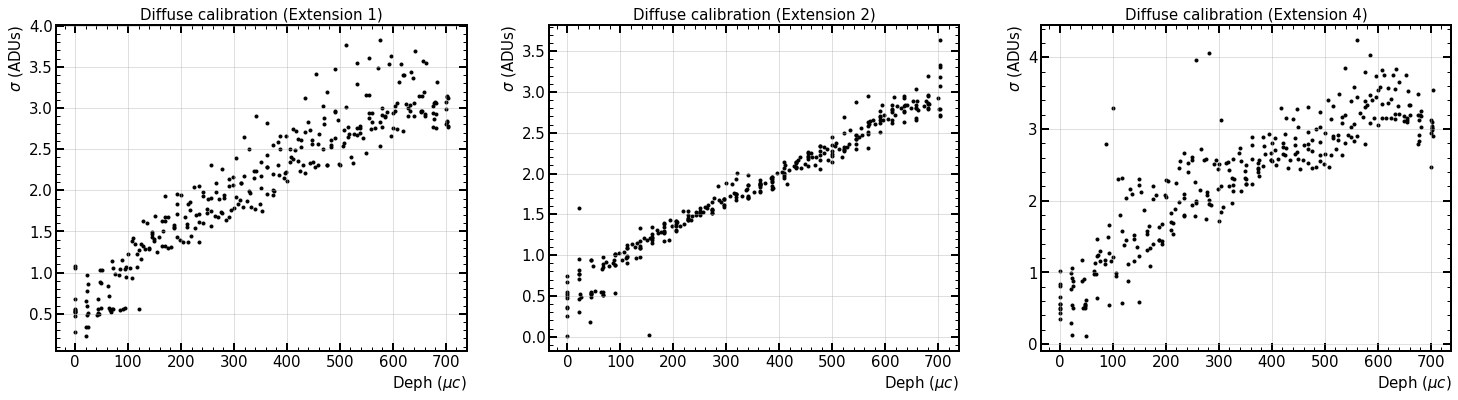

In [529]:
fig_2, axs_all_2 = plt.subplots(1,3,figsize = [25, 6])
# fig, axs_all = plt.subplots(figsize = [10, 10])
n_muon = 0
CCD_depth = 725 #micras


list_all_sigmas = []
# for label_event in (131, 508, 686, 1166, 1610, 2769, 3224, 3493):

for label_event in (53, 87, 464, 700, 862, 909, 1166, 1610, 2769, 3224):
    event = matrix_ext_1_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon - 1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[0].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')#, label = 'Muon: ' + str(n_muon))
    n_muon = n_muon + 1


for label_event in (56, 107, 133, 335, 587, 821, 884, 1206, 1454, 1926):
    event = matrix_ext_2_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[1].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


for label_event in (3, 31, 77, 617, 660, 792, 862, 1911, 2381, 2930):
    event = matrix_ext_4_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[2].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


Logntidud_all_sigmas = len(list_all_sigmas)

array_x = np.linspace(0, Logntidud_all_sigmas, Logntidud_all_sigmas)

# popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
# dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
# axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

# axs_all_2.legend()
# fig_2.suptitle('Modelo de Difusión ( con ' + str(n_muon) + ' muones)',  size = 20, y=0.92 )
axs_all_2[0].set_title('Diffuse calibration (Extension 1)', size = 15)#, y=0.92)}
axs_all_2[1].set_title('Diffuse calibration (Extension 2)', size = 15)#, y=0.92)
axs_all_2[2].set_title('Diffuse calibration (Extension 4)', size = 15)#, y=0.92)

axs_all_2[0].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[0].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[0].grid()

axs_all_2[1].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[1].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[1].grid()

axs_all_2[2].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[2].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[2].grid()

plt.show()

# Visualizar Muones en PDF

In [31]:
sample_horizontal = []
for index in np.arange(0, int(len(matrix_ext_1_horizontal)/4)):
    sample_horizontal.append(matrix_ext_1_horizontal[index])

In [20]:
list_path = path.split('_')
print(list_path)
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

['/home/bruce/Documents/Programas/Catalogo', 'Eventos/dict', '', 'straight', 'muons', 'Extensions', '1', 'to', '4', 'Imgs', '2078', 'Elip', '0', 'Sol', '0.7', 'ADUs', '', '.pkl']


In [32]:
### Nombre del PDF ###
extension = 1

list_path = path.split('_')
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

PDF_images_name = "Muones-Horizontales_Ext_" + str(extension) + "_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

# c = canvas.Canvas("Muones-Verticales.pdf")
c = canvas.Canvas(PDF_images_name)
# c = canvas.Canvas("Muones_Rectos.pdf")

path_image = 'Perfil_Muon.jpg'

# list_n_vertical = []
# list_n_events = []

n_events = 0
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410]) ## Las hojas tendrán 9 muones
w, h = A4 ## dimensiones del formato
num_pages = 0
c.showPage()
n_last_events = 0

# for extension in (1,2,4):
c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
# n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
n_vertical = len(sample_horizontal)
# n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_last_events = 0
n_events = 0
# print(n_vertical % 9 != 0)

if (n_vertical%9) == 0:
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages) + '.a')
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

if (n_vertical%9) != 0:
    
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_vertical >= 6:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])

        if  n_vertical < 6:
            n_last_events = n_last_events + 1
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            charge = event.sum()
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_vertical == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg




plt.close()
c.save()